### Sentiment Analysis On The Comments Of Youtube Video

In [13]:
# Import libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("youtube-comments.csv")

In [15]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,The Sigma Male,What if comments are in regional languages??,2022-07-12T04:14:21Z,0,0.0
1,Mohamed Kather,mam please send me this code mam,2022-06-12T08:37:37Z,0,0.0
2,Arun Karthick,Hi mam can you pls share the code,2022-05-15T13:18:36Z,0,0.0
3,Aadesh Dadhich,"Hi Pritha , please share the source code on ma...",2022-05-11T07:00:56Z,1,0.0
4,Aadesh Dadhich,please share code,2022-05-11T05:59:37Z,0,0.0


In [16]:
# Clean the text:

# Function to remove punctuation
def cleanTxt(text):
  text = re.sub(r'[^\w]', ' ', text)

  return text


df['Comment'] = df['Comment'].apply(cleanTxt)

In [17]:
#lowercasing
df['Comment'] = df['Comment'].str.lower()

In [18]:
df

,Name,Comment,Time,Likes,Reply Count
0,The Sigma Male,what if comments are in regional languages,2022-07-12T04:14:21Z,0,0.0
1,Mohamed Kather,mam please send me this code mam,2022-06-12T08:37:37Z,0,0.0
2,Arun Karthick,hi mam can you pls share the code,2022-05-15T13:18:36Z,0,0.0
3,Aadesh Dadhich,hi pritha please share the source code on ma...,2022-05-11T07:00:56Z,1,0.0
4,Aadesh Dadhich,please share code,2022-05-11T05:59:37Z,0,0.0
5,classic kannada,ma am pls send me code,2022-05-11T03:00:11Z,0,0.0
6,Оля Гончарова,surce code plese,2022-04-04T12:16:19Z,0,0.0
7,mr geroot,hey pritha may i get the script for study,2022-03-26T00:06:58Z,0,0.0
8,Nassima Ghazali,please share source codes,2022-01-26T23:01:50Z,0,0.0
9,Harichandana p,hi pritha could you share me the code for onl...,2021-12-31T09:36:54Z,0,0.0


In [19]:
#Remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
            
        x = new_text[:]
        new_text.clear()
        return ''.join(x)

In [22]:
df['Comment'] = df['Comment'].apply(remove_stopwords)

In [23]:
df

,Name,Comment,Time,Likes,Reply Count
0,The Sigma Male,,2022-07-12T04:14:21Z,0,0.0
1,Mohamed Kather,mam,2022-06-12T08:37:37Z,0,0.0
2,Arun Karthick,hi,2022-05-15T13:18:36Z,0,0.0
3,Aadesh Dadhich,hi,2022-05-11T07:00:56Z,1,0.0
4,Aadesh Dadhich,please,2022-05-11T05:59:37Z,0,0.0
5,classic kannada,,2022-05-11T03:00:11Z,0,0.0
6,Оля Гончарова,surce,2022-04-04T12:16:19Z,0,0.0
7,mr geroot,hey,2022-03-26T00:06:58Z,0,0.0
8,Nassima Ghazali,please,2022-01-26T23:01:50Z,0,0.0
9,Harichandana p,hi,2021-12-31T09:36:54Z,0,0.0


## Polarity and Subjectivity

In [24]:
# get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Columns
df['Subjectivity'] = df['Comment'].apply(getSubjectivity)
df['Polarity'] = df['Comment'].apply(getPolarity)

df

,Name,Comment,Time,Likes,Reply Count,Subjectivity,Polarity
0,The Sigma Male,,2022-07-12T04:14:21Z,0,0.0,0.0,0.0
1,Mohamed Kather,mam,2022-06-12T08:37:37Z,0,0.0,0.0,0.0
2,Arun Karthick,hi,2022-05-15T13:18:36Z,0,0.0,0.0,0.0
3,Aadesh Dadhich,hi,2022-05-11T07:00:56Z,1,0.0,0.0,0.0
4,Aadesh Dadhich,please,2022-05-11T05:59:37Z,0,0.0,0.0,0.0
5,classic kannada,,2022-05-11T03:00:11Z,0,0.0,0.0,0.0
6,Оля Гончарова,surce,2022-04-04T12:16:19Z,0,0.0,0.0,0.0
7,mr geroot,hey,2022-03-26T00:06:58Z,0,0.0,0.0,0.0
8,Nassima Ghazali,please,2022-01-26T23:01:50Z,0,0.0,0.0,0.0
9,Harichandana p,hi,2021-12-31T09:36:54Z,0,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

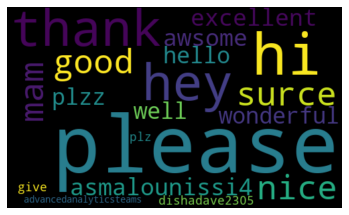

In [25]:
# WordCloud
allWords = ' '.join( [cmts for cmts in df['Comment']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show


In [26]:
# function to compute analysis
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [27]:
# % Percentages:
pcomments = df[df.Analysis == 'Positive']
pcomments = pcomments['Comment']

print('Positive: ' +str(round((pcomments.shape[0]/df.shape[0])*100, 1))+ '%')

ncomments = df[df.Analysis == 'Negative']
ncomments = ncomments['Comment']

print('Negative: ' +str(round((ncomments.shape[0]/df.shape[0])*100, 1))+ '%')

nucomments = df[df.Analysis == 'Neutral']
nucomments = nucomments['Comment']

print('Nuetral: ' +str(round((nucomments.shape[0]/df.shape[0])*100, 1))+ '%')

Positive: 15.0%
Negative: 0.0%
Nuetral: 85.0%


### 0% negative shows that mostly people like this video

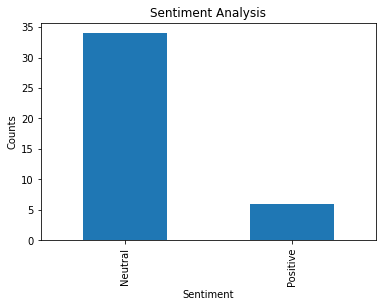

In [29]:
# Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()